In [1]:
import networkx as nx
import pandas as pd
import numpy as np

### Leemos el excel descargado de la web del World Bank

In [2]:
cd

/Users/mariocanalestorres


In [3]:
cd ./Documents/TFG\ Matemáticas/

/Users/mariocanalestorres/Documents/TFG Matemáticas


In [4]:
df = pd.read_excel("./top 50 hist 20 años.xlsx")

In [5]:
df

,Country Name,Country Code,2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,United States,USA,1.058182e+13,1.093642e+13,1.145824e+13,1.221373e+13,1.303664e+13,1.381461e+13,1.445186e+13,1.471284e+13,...,1.554258e+13,1.619701e+13,1.678485e+13,1.752716e+13,1.823830e+13,1.874508e+13,1.954298e+13,2.061186e+13,2.143322e+13,2.095303e+13
1,China,CHN,1.339396e+12,1.470550e+12,1.660288e+12,1.955347e+12,2.285966e+12,2.752132e+12,3.550343e+12,4.594307e+12,...,7.551500e+12,8.532230e+12,9.570406e+12,1.047568e+13,1.106155e+13,1.123328e+13,1.231041e+13,1.389482e+13,1.427994e+13,1.472273e+13
2,Japan,JPN,4.374712e+12,4.182846e+12,4.519562e+12,4.893116e+12,4.831467e+12,4.601663e+12,4.579751e+12,5.106679e+12,...,6.233147e+12,6.272363e+12,5.212328e+12,4.896994e+12,4.444931e+12,5.003678e+12,4.930837e+12,5.036892e+12,5.148782e+12,5.057759e+12
3,Germany,DEU,1.944107e+12,2.068624e+12,2.496129e+12,2.809188e+12,2.845803e+12,2.992197e+12,3.421229e+12,3.730028e+12,...,3.744409e+12,3.527345e+12,3.732743e+12,3.883920e+12,3.356236e+12,3.467498e+12,3.681733e+12,3.975347e+12,3.888327e+12,3.846414e+12
4,United Kingdom,GBR,1.643908e+12,1.784077e+12,2.057094e+12,2.421814e+12,2.544829e+12,2.717060e+12,3.106182e+12,2.938882e+12,...,2.674891e+12,2.719158e+12,2.803291e+12,3.087166e+12,2.956574e+12,2.722852e+12,2.699017e+12,2.900791e+12,2.878674e+12,2.759804e+12
5,India,IND,4.854410e+11,5.149379e+11,6.076993e+11,7.091485e+11,8.203816e+11,9.402599e+11,1.216735e+12,1.198896e+12,...,1.823050e+12,1.827638e+12,1.856722e+12,2.039127e+12,2.103588e+12,2.294798e+12,2.651473e+12,2.701112e+12,2.870504e+12,2.660245e+12
6,France,FRA,1.376465e+12,1.494287e+12,1.840481e+12,2.115742e+12,2.196126e+12,2.318594e+12,2.657213e+12,2.918383e+12,...,2.861408e+12,2.683825e+12,2.811078e+12,2.852166e+12,2.438208e+12,2.471286e+12,2.588741e+12,2.789594e+12,2.728870e+12,2.630318e+12
7,Italy,ITA,1.167013e+12,1.270712e+12,1.574146e+12,1.803227e+12,1.857524e+12,1.947920e+12,2.210293e+12,2.398857e+12,...,2.291991e+12,2.087077e+12,2.141315e+12,2.159134e+12,1.835899e+12,1.875797e+12,1.956950e+12,2.090911e+12,2.009384e+12,1.888709e+12
8,Canada,CAN,7.389818e+11,7.606493e+11,8.955406e+11,1.026690e+12,1.173109e+12,1.319265e+12,1.468820e+12,1.552990e+12,...,1.793327e+12,1.828366e+12,1.846597e+12,1.805750e+12,1.556509e+12,1.527995e+12,1.649266e+12,1.725329e+12,1.742015e+12,1.645423e+12
9,Korea Rep.,KOR,5.476582e+11,6.272461e+11,7.027173e+11,7.931750e+11,9.349011e+11,1.053217e+12,1.172614e+12,1.047339e+12,...,1.253223e+12,1.278428e+12,1.370795e+12,1.484318e+12,1.465773e+12,1.500112e+12,1.623901e+12,1.724846e+12,1.651423e+12,1.637896e+12


### Para cada fila creamos un array con los valores ordenados. Será el ranking de cada año.
#### Metemos los rankings en una matriz.

In [6]:
listaYears = df.columns.values[2::]

In [7]:
listaYears

array(['2001 [YR2001]', '2002 [YR2002]', '2003 [YR2003]', '2004 [YR2004]',
       '2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]', '2008 [YR2008]',
       '2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]',
       '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]',
       '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]'],
      dtype=object)

In [8]:
len(listaYears)

20

In [9]:
listaYears = df.columns.values[2::] #cabeceras de las columnas con valores para cada año
rankings = [] #lista de tuplas
for i in listaYears:
    r = df.loc[:,["Country Code",i]]
    rankOrdered =  r.sort_values(i,ascending=False) #obtenemos el ranking ordenado
    l = np.asarray(rankOrdered.iloc[:,0]) #convertimos en numpy array la lista de paises
    rankings.append([i[0:4],l]) #insertamos en la tupla el elemento [año,ranking]

rankings

[['2001',
  array(['USA', 'JPN', 'DEU', 'GBR', 'FRA', 'CHN', 'ITA', 'MEX', 'CAN',
         'ESP', 'BRA', 'KOR', 'IND', 'NLD', 'AUS', 'RUS', 'CHE', 'ARG',
         'SWE', 'BEL', 'TUR', 'AUT', 'POL', 'SAU', 'NOR', 'HKG', 'DNK',
         'IDN', 'ZAF', 'ISR', 'FIN', 'IRN', 'PRT', 'THA', 'IRL', 'ARE',
         'COL', 'EGY', 'MYS', 'SGP', 'PAK', 'PHL', 'NGA', 'CHL', 'CZE',
         'BGD', 'NZL', 'PER', 'ROU', 'VNM'], dtype=object)],
 ['2002',
  array(['USA', 'JPN', 'DEU', 'GBR', 'FRA', 'CHN', 'ITA', 'MEX', 'CAN',
         'ESP', 'KOR', 'IND', 'BRA', 'NLD', 'AUS', 'RUS', 'CHE', 'SWE',
         'BEL', 'TUR', 'AUT', 'POL', 'IDN', 'NOR', 'SAU', 'DNK', 'HKG',
         'FIN', 'THA', 'PRT', 'ZAF', 'IRN', 'IRL', 'ISR', 'ARE', 'MYS',
         'COL', 'ARG', 'NGA', 'SGP', 'EGY', 'PHL', 'CZE', 'PAK', 'CHL',
         'NZL', 'PER', 'BGD', 'ROU', 'VNM'], dtype=object)],
 ['2003',
  array(['USA', 'JPN', 'DEU', 'GBR', 'FRA', 'CHN', 'ITA', 'ESP', 'CAN',
         'MEX', 'KOR', 'IND', 'NLD', 'BRA', 'AUS', 'RUS'

In [10]:
dataraw = []
for i in rankings:
    dataraw.append(i[1])

dataraw = np.asarray(dataraw)
totalRankings = pd.DataFrame(np.transpose(dataraw))

In [11]:
años = []
for i in range(2001,2021):
    años.append(i)
totalRankings.columns = años
totalRankings.index = totalRankings.index + 1

In [12]:
totalRankings

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA
2,JPN,JPN,JPN,JPN,JPN,JPN,JPN,JPN,JPN,CHN,CHN,CHN,CHN,CHN,CHN,CHN,CHN,CHN,CHN,CHN
3,DEU,DEU,DEU,DEU,DEU,DEU,CHN,CHN,CHN,JPN,JPN,JPN,JPN,JPN,JPN,JPN,JPN,JPN,JPN,JPN
4,GBR,GBR,GBR,GBR,GBR,CHN,DEU,DEU,DEU,DEU,DEU,DEU,DEU,DEU,DEU,DEU,DEU,DEU,DEU,DEU
5,FRA,FRA,FRA,FRA,CHN,GBR,GBR,GBR,FRA,FRA,FRA,GBR,FRA,GBR,GBR,GBR,GBR,GBR,GBR,GBR
6,CHN,CHN,CHN,CHN,FRA,FRA,FRA,FRA,GBR,GBR,GBR,FRA,GBR,FRA,FRA,FRA,IND,FRA,IND,IND
7,ITA,ITA,ITA,ITA,ITA,ITA,ITA,ITA,ITA,BRA,BRA,BRA,BRA,BRA,IND,IND,FRA,IND,FRA,FRA
8,MEX,MEX,ESP,ESP,CAN,CAN,ESP,BRA,BRA,ITA,ITA,RUS,RUS,ITA,ITA,ITA,BRA,ITA,ITA,ITA
9,CAN,CAN,CAN,CAN,ESP,ESP,CAN,RUS,ESP,IND,RUS,ITA,ITA,RUS,BRA,BRA,ITA,BRA,BRA,CAN
10,ESP,ESP,MEX,KOR,KOR,BRA,BRA,ESP,CAN,CAN,IND,CAN,IND,IND,CAN,CAN,CAN,CAN,CAN,KOR


#### Lo exportamos y leemos en disco (formato CSV) para tener persistencia en los datos

In [13]:
totalRankings.to_csv ('./Rankings 2001-2020 del top 50 de 2020 por PIB.csv', index = True, header=True)

In [14]:
ls

CODE FUENTE DENDOGRAMA SIN MA.svg
COMDEC.jpeg
Competitivity weighted graph.png
DENDOGRAMA SIN MARCA DE AGUA.png
Datos PIB 2020/
Datos PIB 2020.zip
De partición a dendograma.png
Deteccion_de_comunidades_en_redes_Algoritmos_y_ap.pdf
Ejemplo Uso interfaz.png
Estructura de comunidades ejemplo.jpeg
GraficoExcel.png
Imagen Estructura df.png
IntRisk3.pdf
MRomance.compressed.pdf
MatrizAdyacenciaGrafo.rtf
Notas TFG Mates.docx
PIBS grafico WB 2020.png
PaperGirvanNewman.pdf
Plantilla LaTeX TFG Memoria ETSII URJC (1).zip
RECLAMACIÓN Mario Canales Torres a Hospital Fundación Jiménez Díaz.docx
Rankings 2001-2020 del top 50 de 2020 por PIB.csv
Representacion top50 2020.png
SALIDA GN.png
Tops 50/
Un semestre de matematica discreta.pdf
VisualizacionRanking.png
apuntes GEOCOM/
betweeness de nodos.png
competitividad futbol .pdf
complex.pdf
comunidadesgeneradas.rtf
dendrogram.png
diagrama con ancho bordes por betweeness de borde.png
ejemplo clust coef.png
grafoCompNoPond.png
grafoNoPond.png
horas TFG

In [15]:
df = pd.read_csv("./Rankings 2001-2020 del top 50 de 2020 por PIB.csv", index_col=0)

In [16]:
df

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA
2,JPN,JPN,JPN,JPN,JPN,JPN,JPN,JPN,JPN,CHN,CHN,CHN,CHN,CHN,CHN,CHN,CHN,CHN,CHN,CHN
3,DEU,DEU,DEU,DEU,DEU,DEU,CHN,CHN,CHN,JPN,JPN,JPN,JPN,JPN,JPN,JPN,JPN,JPN,JPN,JPN
4,GBR,GBR,GBR,GBR,GBR,CHN,DEU,DEU,DEU,DEU,DEU,DEU,DEU,DEU,DEU,DEU,DEU,DEU,DEU,DEU
5,FRA,FRA,FRA,FRA,CHN,GBR,GBR,GBR,FRA,FRA,FRA,GBR,FRA,GBR,GBR,GBR,GBR,GBR,GBR,GBR
6,CHN,CHN,CHN,CHN,FRA,FRA,FRA,FRA,GBR,GBR,GBR,FRA,GBR,FRA,FRA,FRA,IND,FRA,IND,IND
7,ITA,ITA,ITA,ITA,ITA,ITA,ITA,ITA,ITA,BRA,BRA,BRA,BRA,BRA,IND,IND,FRA,IND,FRA,FRA
8,MEX,MEX,ESP,ESP,CAN,CAN,ESP,BRA,BRA,ITA,ITA,RUS,RUS,ITA,ITA,ITA,BRA,ITA,ITA,ITA
9,CAN,CAN,CAN,CAN,ESP,ESP,CAN,RUS,ESP,IND,RUS,ITA,ITA,RUS,BRA,BRA,ITA,BRA,BRA,CAN
10,ESP,ESP,MEX,KOR,KOR,BRA,BRA,ESP,CAN,CAN,IND,CAN,IND,IND,CAN,CAN,CAN,CAN,CAN,KOR


### Creamos el algoritmo que genera el grafo de competitividad

In [17]:
listaPrimeros = np.asarray(df.get('2001')) #lista que tiene los primeros nodos

In [18]:
np.where(listaPrimeros == 'CHL')[0][0] #como sacar la posicion del pais, y por rankings

43

In [19]:
def posicionEnRanking(rnk,pais):
    return np.where(rnk==pais)[0][0]

In [20]:
#POR EJEMPLO TODAS LAS POSICIONES QUE HA OCUPADO ESPAÑA
for i in rankings:
    print(i[0],end=": ")
    print(posicionEnRanking(i[1],'ESP'))

2001: 9
2002: 9
2003: 7
2004: 7
2005: 8
2006: 8
2007: 7
2008: 9
2009: 8
2010: 11
2011: 11
2012: 12
2013: 13
2014: 13
2015: 13
2016: 12
2017: 13
2018: 13
2019: 12
2020: 13


In [21]:
#################################
## PSEUDOCÓDIGO DEL ALGORITMO  ##
#################################
##IDEA -> GENERAR MATRIZ DE ADYACENCIA
##para rankings tenemos que montar una matriz 50x50 de zeros, si i adelanta a j se le pone +1 en [i,j] y +1 en [j,i]
##¿Cómo vemos si uno adelanta a otro?
## DESDE 2001 a 2019:
##Si posAñoSiguiente < posAño ->
##    PARA todos (PAIS) los que están debajo de posAño:
##         SI Pais.PosAñoSiguiente > posAñoSiguiente ->
##               Añadir 1 a la matriz de adyacencia en esas dos posiciones


##SOLO COMPROBAMOS LOS QUE BAJAN, SI COMPROBÁRAMOS TAMBIÉN LOS QUE SUBEN ESTARÍAMOS AÑADIENDO EL ADELANTAMIENTO 2 VECES
## EN PRINCIPIO LO HACEMOS ASÍ PARA HACER EL GRAFO PONDERADO. SINO, LO HACEMOS BINARIO
## SE VEN TODOS LOS CASOS?? -> SI, si sube es porque otro ha bajado.


In [22]:
##Creamos ranking
listaNodos = rankings[0][1]
MatAdy = np.zeros((50,50))

In [23]:
listaNodos

array(['USA', 'JPN', 'DEU', 'GBR', 'FRA', 'CHN', 'ITA', 'MEX', 'CAN',
       'ESP', 'BRA', 'KOR', 'IND', 'NLD', 'AUS', 'RUS', 'CHE', 'ARG',
       'SWE', 'BEL', 'TUR', 'AUT', 'POL', 'SAU', 'NOR', 'HKG', 'DNK',
       'IDN', 'ZAF', 'ISR', 'FIN', 'IRN', 'PRT', 'THA', 'IRL', 'ARE',
       'COL', 'EGY', 'MYS', 'SGP', 'PAK', 'PHL', 'NGA', 'CHL', 'CZE',
       'BGD', 'NZL', 'PER', 'ROU', 'VNM'], dtype=object)

In [24]:
#Creamos diccionario para indexar los vertices (de siglas a numeros)
#por ejemplo dictVertices['USA'] = 1
dictVertices = {}
k=0
for i in listaNodos:
    dictVertices[i]=k
    k = k + 1

In [25]:
#Creamos el diccionario inverso (de numero a nombre)
#dictIndices[1]='USA'
dictIndices = {}
k=0
for i in listaNodos:
    dictIndices[k]=i
    k = k + 1

In [26]:
#para sacar el num de vertice de cada pais consultamos su valor en el diccionario
dictVertices['CHN'] #5

5

In [27]:
dictIndices[5]

'CHN'

In [28]:
'''
Definición del algoritmo: ->

Perspectiva de ver bajadas
del primer ranking al penúltimo:
    del primero al penúltimo:
        si pos(pais) baja:
            para todos los que están debajo ver si le han adelantado,
            si le han adelantado sumamos uno en la matriz de adyacencia de los dos paises
            (para ver donde ver indices en diccionario)
        sino:
            seguir
'''
for i in range(len(rankings)-1): #i avanza hasta el penultimo
    rankAct = rankings[i][1]
    rankSig = rankings[i+1][1]
    for pais in rankAct:
        pos_act = posicionEnRanking(rankAct, pais)
        if(pos_act)!=len(rankAct): #no es el ultimo
            #vemos si ha bajado
            pos_sgt = posicionEnRanking(rankSig,pais)
            if(pos_sgt > pos_act):
                #el pais ha bajado, ver los que le han adelantado y 
                #añadir 1 a la matriz de adyacencia
                for pais_inf in rankAct[pos_act+1::]:
                    if(posicionEnRanking(rankSig,pais_inf) < pos_sgt): #uno que estaba abajo le ha adelantado
                        #añadir 1 a la matriz de ady:
                        #sacamos indices
                        ind1 = dictVertices[pais]
                        ind2 = dictVertices[pais_inf]
                        #sumamos a la matriz de ady
                        MatAdy[ind1][ind2] = MatAdy[ind1][ind2] + 1
                        MatAdy[ind2][ind1] = MatAdy[ind2][ind1] + 1
                        #comprobacion:
                        print(pais_inf + " ha adelantado a " + pais)
    print() #imprimimos cada adelantamiento en forma de logs

KOR ha adelantado a BRA
IND ha adelantado a BRA
SWE ha adelantado a ARG
BEL ha adelantado a ARG
TUR ha adelantado a ARG
AUT ha adelantado a ARG
POL ha adelantado a ARG
SAU ha adelantado a ARG
NOR ha adelantado a ARG
HKG ha adelantado a ARG
DNK ha adelantado a ARG
IDN ha adelantado a ARG
ZAF ha adelantado a ARG
ISR ha adelantado a ARG
FIN ha adelantado a ARG
IRN ha adelantado a ARG
PRT ha adelantado a ARG
THA ha adelantado a ARG
IRL ha adelantado a ARG
ARE ha adelantado a ARG
COL ha adelantado a ARG
MYS ha adelantado a ARG
NOR ha adelantado a SAU
IDN ha adelantado a SAU
DNK ha adelantado a HKG
IDN ha adelantado a HKG
FIN ha adelantado a ZAF
PRT ha adelantado a ZAF
THA ha adelantado a ZAF
FIN ha adelantado a ISR
IRN ha adelantado a ISR
PRT ha adelantado a ISR
THA ha adelantado a ISR
IRL ha adelantado a ISR
MYS ha adelantado a EGY
SGP ha adelantado a EGY
NGA ha adelantado a EGY
PHL ha adelantado a PAK
NGA ha adelantado a PAK
CZE ha adelantado a PAK
CZE ha adelantado a CHL
NZL ha adelantad

In [29]:
print(MatAdy)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 2. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]


In [30]:
np.savetxt("./matAdyGrafoComp.txt",MatAdy)

In [31]:
d = [MatAdy[:].astype(int)]

In [32]:
listaNodos

array(['USA', 'JPN', 'DEU', 'GBR', 'FRA', 'CHN', 'ITA', 'MEX', 'CAN',
       'ESP', 'BRA', 'KOR', 'IND', 'NLD', 'AUS', 'RUS', 'CHE', 'ARG',
       'SWE', 'BEL', 'TUR', 'AUT', 'POL', 'SAU', 'NOR', 'HKG', 'DNK',
       'IDN', 'ZAF', 'ISR', 'FIN', 'IRN', 'PRT', 'THA', 'IRL', 'ARE',
       'COL', 'EGY', 'MYS', 'SGP', 'PAK', 'PHL', 'NGA', 'CHL', 'CZE',
       'BGD', 'NZL', 'PER', 'ROU', 'VNM'], dtype=object)

In [33]:
AdyEnt = d[0]

In [34]:
for i in AdyEnt:
    for k in i:
        print(k,end=" ")
    print()

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 4 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 4 0 1 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 1 1 1 3 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 1 0 3 2 0 2 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 1 3 0 1 1 1 0 5 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [35]:
#Creamos tambien la matriz del grafo no ponderado
MatNoPond = np.zeros((50,50))
for i in range(50):
    for k in range(50):
        if AdyEnt[i,k]>0:
            MatNoPond[i,k]=1


In [36]:
#la imprimimos para ver
MatNoPond = [MatNoPond[:].astype(int)][0]
for i in MatNoPond:
    for k in i:
        print(k,end=" ")
    print()

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [37]:
#creamos el grafo
G = nx.Graph()

In [38]:
#añadimos los nodos
G.add_nodes_from(listaNodos)

In [39]:
#añadimos los bordes
for i in range(0,49):
    for k in range(i+1,50):
        if(MatNoPond[i,k]>0):
            G.add_edge(dictIndices[i],dictIndices[k])
        

### Distintos dibujos del grafo NO PONDERADO

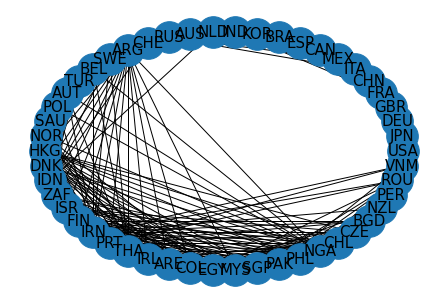

In [40]:
from matplotlib import pyplot as plt
nx.draw_circular(G,with_labels=True,node_size=1000,font_size=15)
plt.rcParams["figure.figsize"] = (12,12)
plt.show()

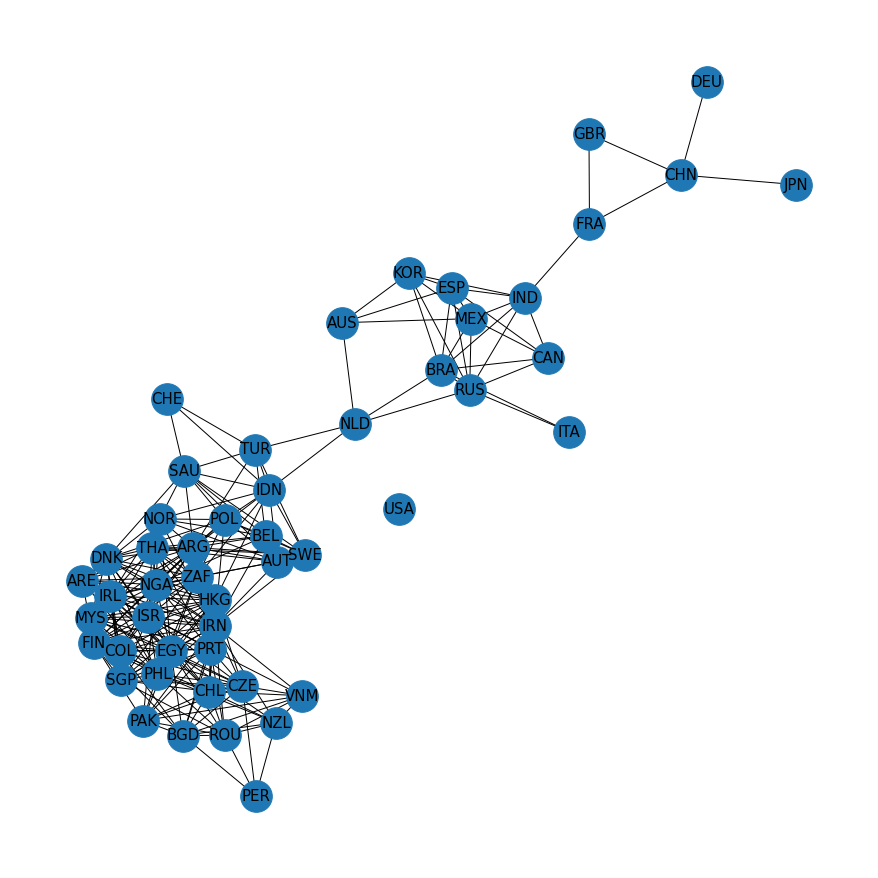

In [41]:
nx.draw_kamada_kawai(G,with_labels=True,node_size=1000,font_size=15)

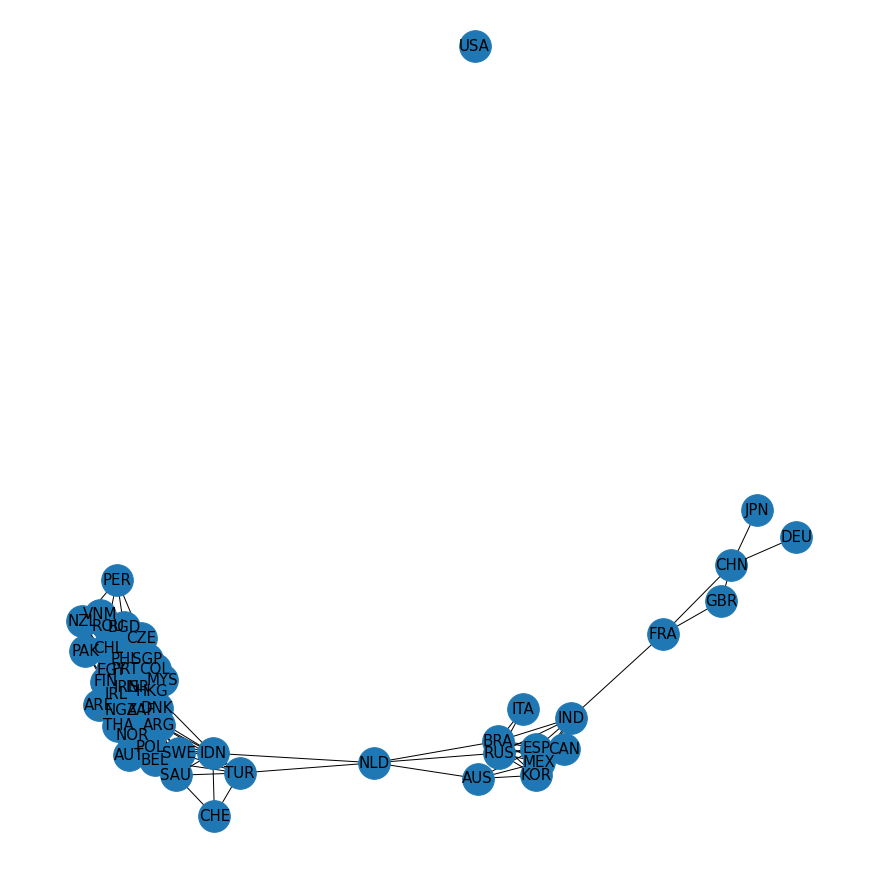

In [42]:
nx.draw_spring(G,with_labels=True,node_size=1000,font_size=15)

## Detección de counidades

In [43]:
from networkx.algorithms import community 
comp = community.girvan_newman(G)
tuple(sorted(c) for c in next(comp))

(['USA'],
 ['AUS',
  'BRA',
  'CAN',
  'CHN',
  'DEU',
  'ESP',
  'FRA',
  'GBR',
  'IND',
  'ITA',
  'JPN',
  'KOR',
  'MEX',
  'NLD',
  'RUS'],
 ['ARE',
  'ARG',
  'AUT',
  'BEL',
  'BGD',
  'CHE',
  'CHL',
  'COL',
  'CZE',
  'DNK',
  'EGY',
  'FIN',
  'HKG',
  'IDN',
  'IRL',
  'IRN',
  'ISR',
  'MYS',
  'NGA',
  'NOR',
  'NZL',
  'PAK',
  'PER',
  'PHL',
  'POL',
  'PRT',
  'ROU',
  'SAU',
  'SGP',
  'SWE',
  'THA',
  'TUR',
  'VNM',
  'ZAF'])

In [44]:
import itertools
lista = []
k = 4
comp = community.girvan_newman(G)
for communities in itertools.islice(comp, k):
    print(tuple(sorted(c) for c in communities))
    lista.append(tuple(sorted(c) for c in communities))

(['USA'], ['AUS', 'BRA', 'CAN', 'CHN', 'DEU', 'ESP', 'FRA', 'GBR', 'IND', 'ITA', 'JPN', 'KOR', 'MEX', 'NLD', 'RUS'], ['ARE', 'ARG', 'AUT', 'BEL', 'BGD', 'CHE', 'CHL', 'COL', 'CZE', 'DNK', 'EGY', 'FIN', 'HKG', 'IDN', 'IRL', 'IRN', 'ISR', 'MYS', 'NGA', 'NOR', 'NZL', 'PAK', 'PER', 'PHL', 'POL', 'PRT', 'ROU', 'SAU', 'SGP', 'SWE', 'THA', 'TUR', 'VNM', 'ZAF'])
(['USA'], ['CHN', 'DEU', 'FRA', 'GBR', 'JPN'], ['AUS', 'BRA', 'CAN', 'ESP', 'IND', 'ITA', 'KOR', 'MEX', 'NLD', 'RUS'], ['ARE', 'ARG', 'AUT', 'BEL', 'BGD', 'CHE', 'CHL', 'COL', 'CZE', 'DNK', 'EGY', 'FIN', 'HKG', 'IDN', 'IRL', 'IRN', 'ISR', 'MYS', 'NGA', 'NOR', 'NZL', 'PAK', 'PER', 'PHL', 'POL', 'PRT', 'ROU', 'SAU', 'SGP', 'SWE', 'THA', 'TUR', 'VNM', 'ZAF'])
(['USA'], ['CHN', 'DEU', 'FRA', 'GBR', 'JPN'], ['AUS', 'BRA', 'CAN', 'ESP', 'IND', 'ITA', 'KOR', 'MEX', 'NLD', 'RUS'], ['CHE', 'IDN', 'SAU', 'SWE', 'TUR'], ['ARE', 'ARG', 'AUT', 'BEL', 'BGD', 'CHL', 'COL', 'CZE', 'DNK', 'EGY', 'FIN', 'HKG', 'IRL', 'IRN', 'ISR', 'MYS', 'NGA', 'NOR', '

### Representacciones de detección de comunidades parando en distintas iteraciones del algoritmo GN

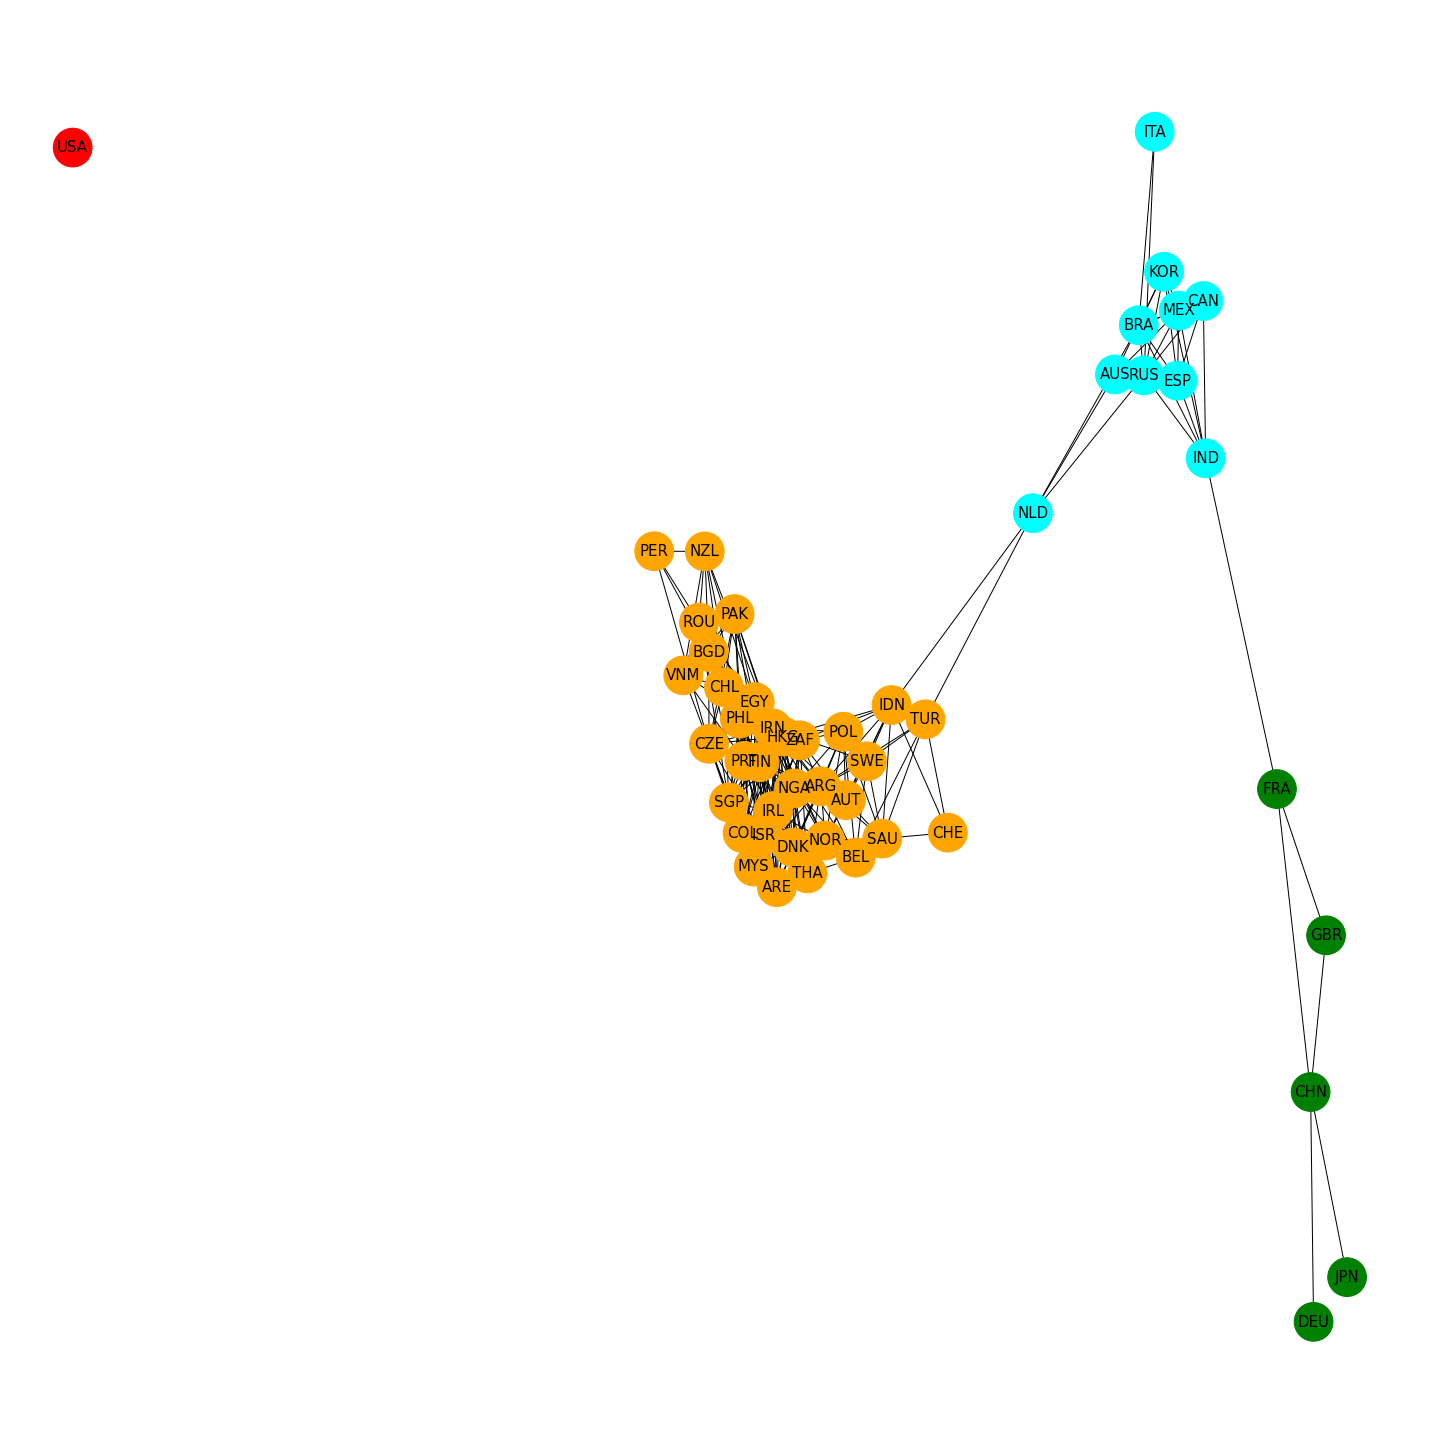

In [45]:
# plot the communities
color_map = []
node_groups = lista[1]
for node in G:
    if node in node_groups[0]:
        color_map.append('red')
    elif node in node_groups[1]: 
        color_map.append('green')  
    elif node in node_groups[2]: 
        color_map.append('cyan')
    else:
        color_map.append('orange')

plt.rcParams["figure.figsize"] = (20,20)
nx.draw(G, node_color=color_map, with_labels=True,node_size=1500,font_size=15)
plt.show()

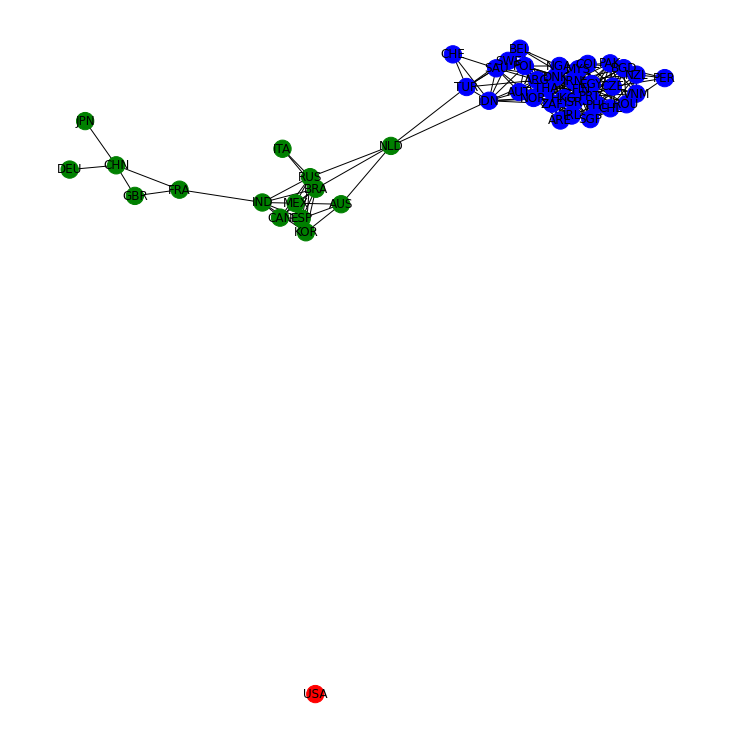

In [46]:
# plot the communities
color_map = []
node_groups = lista[0]
for node in G:
    if node in node_groups[0]:
        color_map.append('red')
    elif node in node_groups[1]: 
        color_map.append('green')  
    elif node in node_groups[2]: 
        color_map.append('blue')
    else:
        color_map.append('orange')

plt.rcParams["figure.figsize"] = (10,10)
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

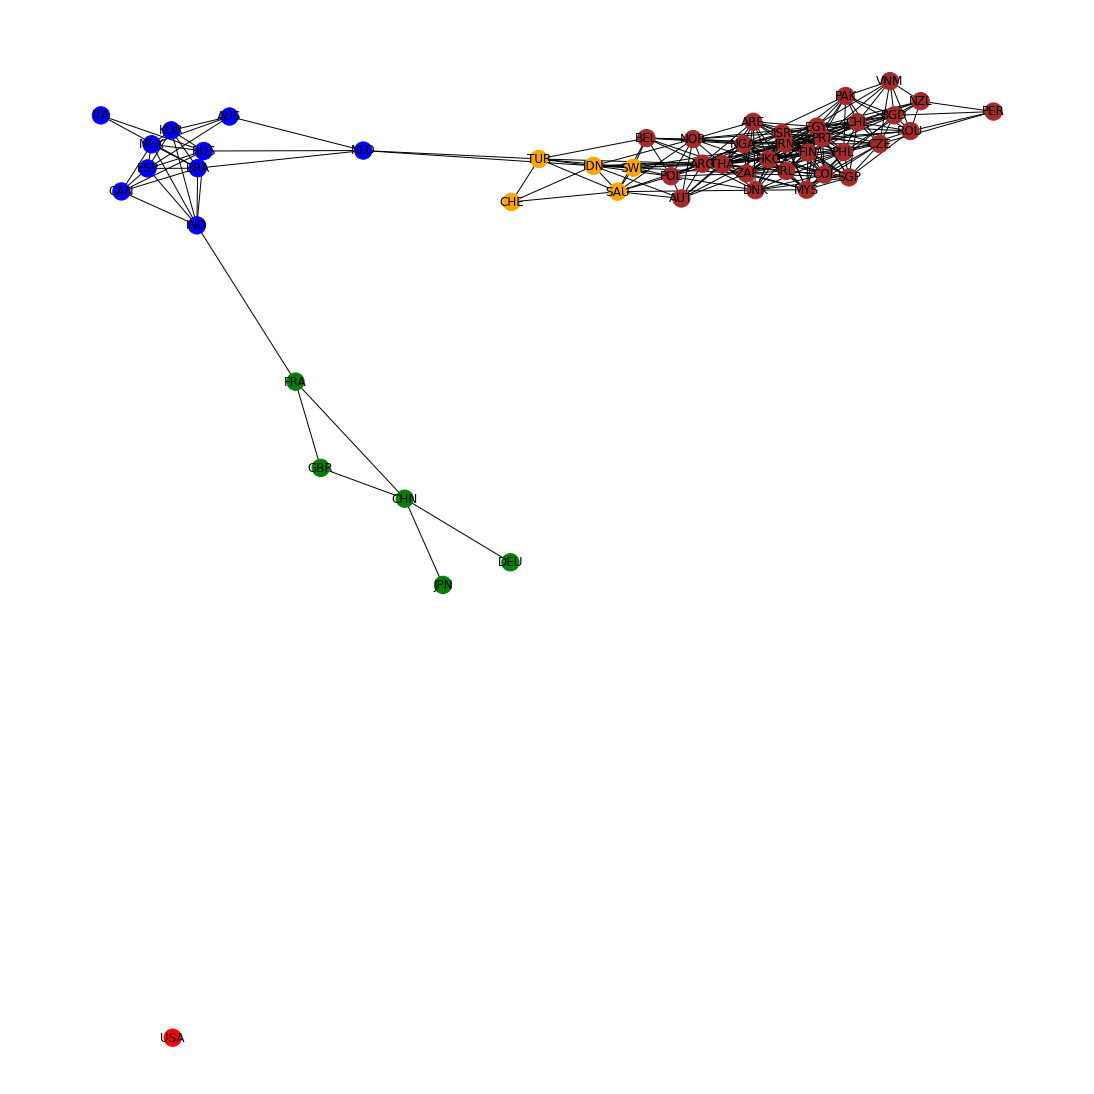

In [47]:
# plot the communities
color_map = []
node_groups = lista[2]
for node in G:
    if node in node_groups[0]:
        color_map.append('red')
    elif node in node_groups[1]: 
        color_map.append('green')  
    elif node in node_groups[2]: 
        color_map.append('blue')
    elif node in node_groups[3]:
        color_map.append('orange')
    elif node in node_groups[4]:
        color_map.append('brown')
    else:
        color_map.append('pink')
plt.rcParams["figure.figsize"] = (15,15)
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

In [48]:
communities = list(community.girvan_newman(G))

## Cuantificación de la competitividad usando 3 coeficientes:


In [49]:
import math
def NMD(adyMatrix):
    """
    Input: Matriz de adyacencia del grafo NO PONDERADO. Elementos binarios
    """
    #El grado de un nodo es la suma de los elementos de la matriz
    # de la fila correspondiente a ese nodo.
    suma = 0
    for i in adyMatrix: #iterar filas 
        for j in i: # por cada fila iterar cada columna
            if(j!=0 and j!=1):
                raise ValueError #lanzar excepción si se pasa matriz no binaria
            suma = suma + j
    n= len(adyMatrix)
    return suma/(n*(n+1))

In [50]:
NMD(MatNoPond)

0.21176470588235294

In [51]:
def NMS(adyMatrix,numRankings):
    n = len(adyMatrix)
    den=(math.comb(n,2)*(numRankings-1))
    #sumamos todos los elementos y dividimos entre 2 
    #ya que las aristas en la matAdy están contadas 2 veces (mat simétrica)
    suma=0
    for i in adyMatrix: #iterar filas 
        for j in i: # por cada fila iterar cada columna
            suma = suma + j
    suma=suma/2
    return suma/den

In [52]:
NMS(MatAdy,20)

0.02247046186895811

In [53]:
nx.average_clustering(G)

0.633511914355568

In [54]:
print("NMD: "+str(NMD(MatNoPond))) #sobre no pond
print("NMS: "+str(NMS(MatAdy,20))) #sobre ponderado
print("COEF CLUST: "+str(nx.average_clustering(G)))

NMD: 0.21176470588235294
NMS: 0.02247046186895811
COEF CLUST: 0.633511914355568


In [55]:
#Comprobación de que el coef clust es igual con el Grafo ponderado
l1 = []
for i in AdyEnt:
    l1.append(np.asarray(i))
l1 = np.asarray(l1)
G2= nx.from_numpy_matrix(l1)
print(nx.average_clustering(G2)) #MISMA SALIDA

0.633511914355568


## Tenemos que leer los otros datasets y generar las matrices de los grafos
Otros datasets de world developement indicators  
En la mayoría de índices excepto en el PIB tenemos valores NaN (vienen expresados con ".." ¿qué estrategia seguimos? Estudiamos la mejor opción para cada caso y decidimos.

### Export value index (2000 = 100)

In [56]:
cd

/Users/mariocanalestorres


In [57]:
cd ./Documents/TFG\ Matemáticas/Tops 50

/Users/mariocanalestorres/Documents/TFG Matemáticas/Tops 50


In [58]:
ls

CGraph GDP growth.png
Competitivity weighted graph.png
Top 50 Commercial service imports.xlsx
Top 50 Expense perc of GDP.xlsx
Top 50 Export value index .xlsx
Top 50 GDP growth annual perc .xlsx
Top 50 GDP per capita.xlsx
Top 50 Import value index .xlsx
Top 50 Service imports.xlsx
diagrama con ancho bordes por betweeness de borde.png
top 50 Commercial Services Exports.xlsx


In [59]:
df_temp = pd.read_excel("./Top 50 Export value index .xlsx")

**Solo un NaN en la última fila de Suiza -> CHE. Lo que hacemos es rellenar ese NaN con el valor anterior en la serie de datos de Suiza**

In [60]:
df_temp = df_temp.replace({"..": np.nan})  #".."=NaN

In [61]:
df_temp = df_temp.fillna( method="ffill", axis=1) #remplaza el NAN con el valor previo de la serie

In [62]:
#para organizar el código definimos el proceso del principio para generar el 
#ranking en una función que toma el dataframe habiendo eliminado los NaNs

def extraer_lista_rankings(datafr):
    listaYears = datafr.columns.values[2::] #lista años
    rankings = [] #lista de tuplas
    for i in listaYears:
        r = datafr.loc[:,["Country Code",i]]
        rankOrdered =  r.sort_values(i,ascending=False) #obtenemos el ranking ordenado
        l = np.asarray(rankOrdered.iloc[:,0]) #convertimos en numpy array la lista de paises
        rankings.append([i,l]) #insertamos en la tupla el elemento [año,ranking]

    return rankings

In [63]:
rankings_export = extraer_lista_rankings(df_temp)

In [64]:
rankings_export

[[2001,
  array(['CZE', 'POL', 'TUR', 'ROU', 'IRL', 'CHN', 'BRA', 'AUT', 'DEU',
         'VNM', 'NZL', 'PAK', 'IND', 'CHE', 'ITA', 'ESP', 'BEL', 'DNK',
         'PER', 'ARG', 'NLD', 'AUS', 'PRT', 'FRA', 'NOR', 'ZAF', 'ARE',
         'RUS', 'GBR', 'MEX', 'BGD', 'CHL', 'HKG', 'COL', 'THA', 'FIN',
         'CAN', 'USA', 'ISR', 'EGY', 'MYS', 'IRN', 'SGP', 'SAU', 'IDN',
         'KOR', 'SWE', 'NGA', 'PHL', 'JPN'], dtype=object)],
 [2002,
  array(['ROU', 'CZE', 'CHN', 'TUR', 'POL', 'AUT', 'IND', 'VNM', 'BEL',
         'IRL', 'CHE', 'DNK', 'DEU', 'PER', 'PAK', 'BRA', 'ESP', 'NZL',
         'PRT', 'ITA', 'EGY', 'NLD', 'ARE', 'RUS', 'AUS', 'FRA', 'HKG',
         'NOR', 'ZAF', 'THA', 'GBR', 'IRN', 'FIN', 'ARG', 'MEX', 'BGD',
         'MYS', 'CHL', 'KOR', 'SWE', 'ISR', 'SAU', 'PHL', 'COL', 'CAN',
         'SGP', 'IDN', 'USA', 'JPN', 'NGA'], dtype=object)],
 [2003,
  array(['CHN', 'TUR', 'ROU', 'POL', 'CZE', 'AUT', 'EGY', 'IND', 'VNM',
         'DEU', 'BEL', 'ESP', 'ARE', 'BRA', 'PAK', 'PER', 'PRT

In [65]:
##Creamos la funcion para generar el grafo ponderado
def generarMatGrafo(listaRankings):
    listaNodos = listaRankings[0][1]
    MatAdy = np.zeros((50,50))
    #dicicionarios Para Indexar Vertices y Nodos
    dictVertices = {}
    k=0
    for i in listaNodos:
        dictVertices[i]=k
        k = k + 1

    dictIndices = {}
    k=0
    for i in listaNodos:
        dictIndices[k]=i
        k = k + 1

    for i in range(len(listaRankings)-1): #i avanza hasta el penultimo
        rankAct = listaRankings[i][1]
        rankSig = listaRankings[i+1][1]
        for pais in rankAct:
            pos_act = posicionEnRanking(rankAct, pais)
            if(pos_act)!=len(rankAct): #no es el ultimo
                #vemos si ha bajado
                pos_sgt = posicionEnRanking(rankSig,pais)
                if(pos_sgt > pos_act):
                    #el pais ha bajado, ver los que le han adelantado y 
                    #añadir 1 a la matriz de adyacencia
                    for pais_inf in rankAct[pos_act+1::]:
                        if(posicionEnRanking(rankSig,pais_inf) < pos_sgt): #uno que estaba abajo le ha adelantado
                            #añadir 1 a la matriz de ady:
                            #sacamos indices
                            ind1 = dictVertices[pais]
                            ind2 = dictVertices[pais_inf]
                            #sumamos a la matriz de ady
                            MatAdy[ind1][ind2] = MatAdy[ind1][ind2] + 1
                            MatAdy[ind2][ind1] = MatAdy[ind2][ind1] + 1
    d = [MatAdy[:].astype(int)][0]
    l1 = []
    for i in d:
        l1.append(np.asarray(i))
    l1 = np.asarray(l1)
    G= nx.from_numpy_matrix(l1)
    G=nx.relabel_nodes(G,dictIndices)
    
    return d,G #Matriz de enteros y grafoPonderado

In [66]:
MatExports,G_exports= generarMatGrafo(rankings_export)

In [67]:
MatExports

array([[0, 2, 6, ..., 2, 0, 0],
       [2, 0, 2, ..., 0, 0, 0],
       [6, 2, 0, ..., 1, 0, 0],
       ...,
       [2, 0, 1, ..., 0, 2, 1],
       [0, 0, 0, ..., 2, 0, 2],
       [0, 0, 0, ..., 1, 2, 0]])

Representamos este para usar en la memoria

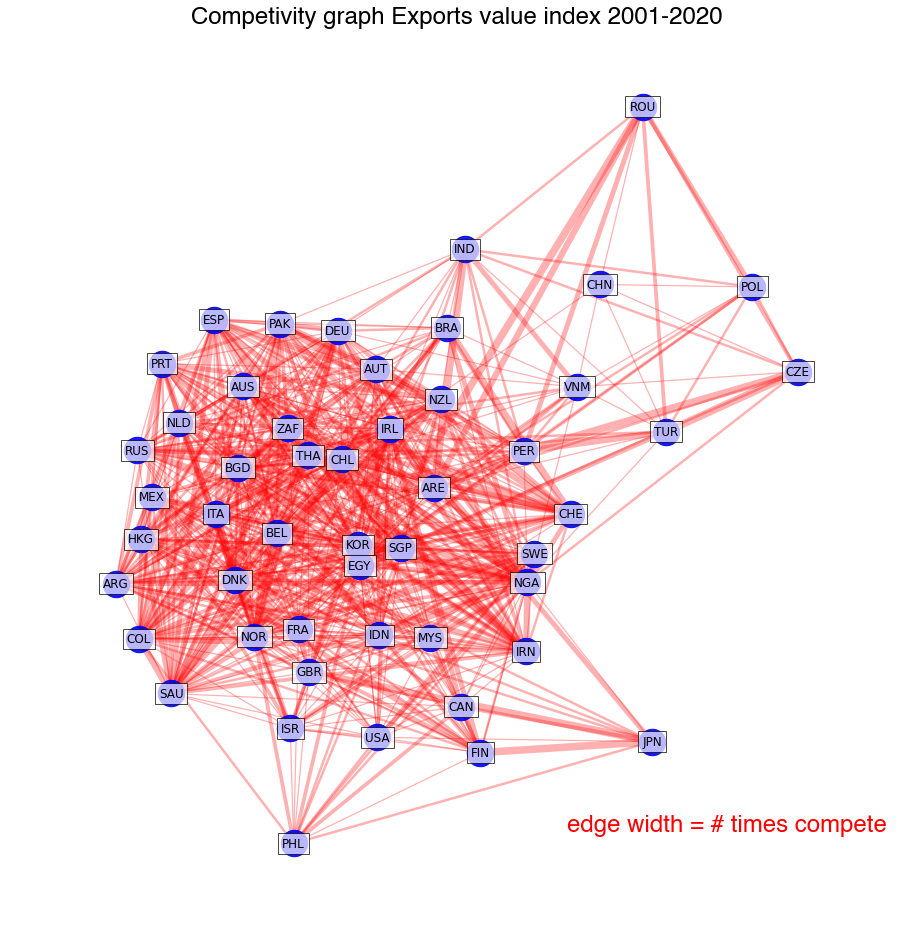

In [70]:
# Generate layout for visualization
pos = nx.kamada_kawai_layout(G_exports)
# Manual tweaking to limit node label overlap in the visualization

#edgewidth in function of weight
edgewidth = [1.25*G_exports.get_edge_data(u, v)['weight'] for u, v in G_exports.edges()]
fig, ax = plt.subplots(figsize=(13, 13))
# Visualize graph components
nx.draw_networkx_edges(G_exports, pos, alpha=0.3, width=edgewidth, edge_color="red")
nx.draw_networkx_nodes(G_exports, pos, node_size=700,node_color="blue", alpha=0.9)
label_options = {"ec": "k", "fc": "white", "alpha": 0.7}
nx.draw_networkx_labels(G_exports, pos, font_size=12, bbox=label_options)

# Title/legend
font = {"fontname": "Helvetica", "color": "black", "fontweight": "bold", "fontsize": 24}
ax.set_title("Competivity graph Exports value index 2001-2020", font)
# Change font color for legend
font["color"] = "r"

ax.text(
    0.80,
    0.10,
    "edge width = # times compete",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)


# Resize figure for label readibility
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
plt.savefig("CGraph ExportsValueIndex.png")
plt.show()

In [71]:
def generarMatBin(mat):
    MatBin = np.zeros((50,50))
    for i in range(50):
        for k in range(50):
            if mat[i,k]>0:
                MatBin[i,k]=1
    return [MatBin[:].astype(int)][0]

In [72]:
MatExportsNoPond = generarMatBin(MatExports)

In [73]:
#Calculamos los valores
print("NMD: "+str(NMD(MatExportsNoPond))) #sobre no pond
print("NMS: "+str(NMS(MatExports,20))) #sobre ponderado
print("COEF CLUST: "+str(nx.average_clustering(G_exports))) #daigual que sea en el ponderado o No->mismo result.

NMD: 0.5121568627450981
NMS: 0.05435016111707841
COEF CLUST: 0.7516523976084174


### GDP per capita

In [107]:
df_temp = pd.read_excel("./Top 50 GDP per capita.xlsx")

In [108]:
df_temp = df_temp.replace({"..": np.nan})  #".."=NaN

In [109]:
df_temp.isnull().values.any() #FALSE: no hay NaNs, generamos el grafo

False

In [110]:
rankings_gdp_cap = extraer_lista_rankings(df_temp)
#comentar que el 1 es suiza. El 1 general es Luxemburgo pero estamos usando los 50
#paises con más PIB general en 2020. 

In [111]:
Mat_gdp_cap, G_gdp_cap = generarMatGrafo(rankings_gdp_cap)

In [112]:
G_gdp_cap

In [113]:
Mat_gdp_cap_NoPond = generarMatBin(Mat_gdp_cap)

In [114]:
print("NMD: "+str(NMD(Mat_gdp_cap_NoPond))) #sobre no pond
print("NMS: "+str(NMS(Mat_gdp_cap,20))) #sobre ponderado
print("COEF CLUST: "+str(nx.average_clustering(G_gdp_cap)))

NMD: 0.15529411764705883
NMS: 0.01740064446831364
COEF CLUST: 0.653400011752953


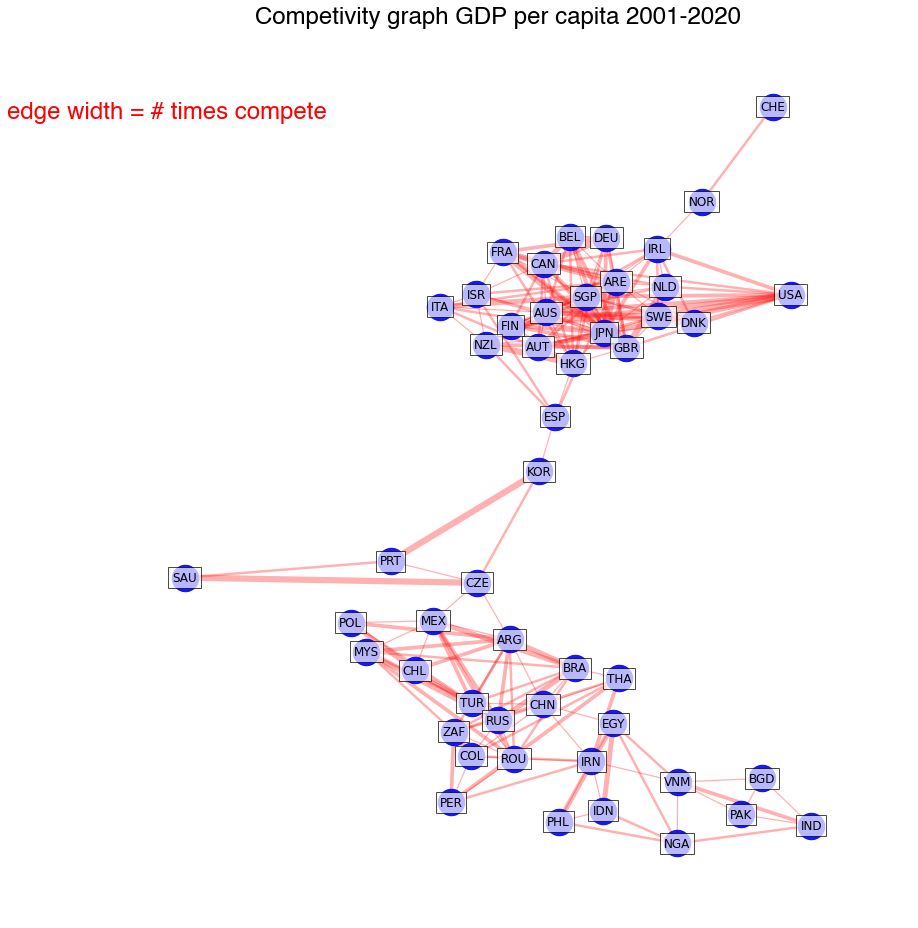

In [117]:
#Generate layout for visualization
pos = nx.kamada_kawai_layout(G_gdp_cap)
# Manual tweaking to limit node label overlap in the visualization

#edgewidth in function of weight
edgewidth = [1.25*G_gdp_cap.get_edge_data(u, v)['weight'] for u, v in G_gdp_cap.edges()]
fig, ax = plt.subplots(figsize=(13, 13))
# Visualize graph components
nx.draw_networkx_edges(G_gdp_cap, pos, alpha=0.3, width=edgewidth, edge_color="red")
nx.draw_networkx_nodes(G_gdp_cap, pos, node_size=700,node_color="blue", alpha=0.9)
label_options = {"ec": "k", "fc": "white", "alpha": 0.7}
nx.draw_networkx_labels(G_gdp_cap, pos, font_size=12, bbox=label_options)

# Title/legend
font = {"fontname": "Helvetica", "color": "black", "fontweight": "bold", "fontsize": 24}
ax.set_title("Competivity graph GDP per capita 2001-2020", font)
# Change font color for legend
font["color"] = "r"

ax.text(
    0.10,
    0.90,
    "edge width = # times compete",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)


# Resize figure for label readibility
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
plt.savefig("CGraph GDP per capita.png")
plt.show()

### Import value index

In [118]:
df_temp = pd.read_excel("./Top 50 Import value index .xlsx")

In [119]:
df_temp = df_temp.replace({"..": np.nan})  #".."=NaN

In [120]:
#mismos NaN que en export value Index, un valor. Misma estrategia
df_temp = df_temp.fillna( method="ffill", axis=1) #remplaza el NAN con el valor previo de la serie

In [121]:
rankings_import = extraer_lista_rankings(df_temp)

In [122]:
Mat_import,G_import= generarMatGrafo(rankings_import)

In [123]:
Mat_import_NoPond = generarMatBin(Mat_import)

In [124]:
print("NMD: "+str(NMD(Mat_import_NoPond))) #sobre no pond
print("NMS: "+str(NMS(Mat_import,20))) #sobre ponderado
print("COEF CLUST: "+str(nx.average_clustering(G_import)))

NMD: 0.5458823529411765
NMS: 0.05916219119226638
COEF CLUST: 0.7545700713048167


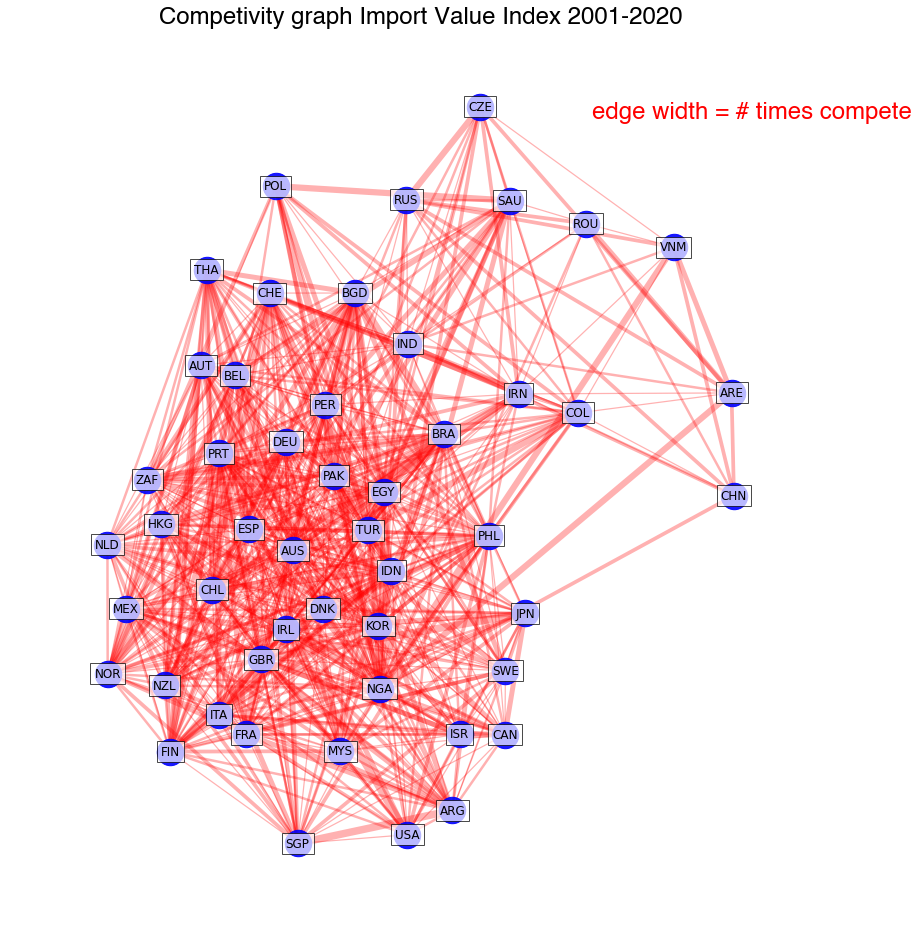

In [125]:
#Generate layout for visualization
pos = nx.kamada_kawai_layout(G_import)
# Manual tweaking to limit node label overlap in the visualization

#edgewidth in function of weight
edgewidth = [1.25*G_import.get_edge_data(u, v)['weight'] for u, v in G_import.edges()]
fig, ax = plt.subplots(figsize=(13, 13))
# Visualize graph components
nx.draw_networkx_edges(G_import, pos, alpha=0.3, width=edgewidth, edge_color="red")
nx.draw_networkx_nodes(G_import, pos, node_size=700,node_color="blue", alpha=0.9)
label_options = {"ec": "k", "fc": "white", "alpha": 0.7}
nx.draw_networkx_labels(G_import, pos, font_size=12, bbox=label_options)

# Title/legend
font = {"fontname": "Helvetica", "color": "black", "fontweight": "bold", "fontsize": 24}
ax.set_title("Competivity graph Import Value Index 2001-2020", font)
# Change font color for legend
font["color"] = "r"

ax.text(
    0.90,
    0.90,
    "edge width = # times compete",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)


# Resize figure for label readibility
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
plt.savefig("CGraph Import.png")
plt.show()

## GDP growth annual perc

In [126]:
df_temp = pd.read_excel("./Top 50 GDP growth annual perc .xlsx")

In [127]:
df_temp = df_temp.replace({"..": np.nan})  #".."=NaN
df_temp.isnull().values.any() #FALSE ->no hay NaNs, generamos el grafo

False

In [128]:
rankings_growth = extraer_lista_rankings(df_temp)

In [129]:
rankings_growth

[[2001,
  array(['CHN', 'VNM', 'NGA', 'IRL', 'ROU', 'RUS', 'BGD', 'KOR', 'IND',
         'ESP', 'IDN', 'PAK', 'EGY', 'NZL', 'THA', 'CHL', 'PHL', 'CZE',
         'ZAF', 'FIN', 'NLD', 'NOR', 'GBR', 'AUS', 'FRA', 'ITA', 'PRT',
         'DEU', 'COL', 'CHE', 'SWE', 'CAN', 'ARE', 'BRA', 'AUT', 'POL',
         'BEL', 'USA', 'IRN', 'DNK', 'PER', 'HKG', 'MYS', 'JPN', 'ISR',
         'MEX', 'SGP', 'SAU', 'ARG', 'TUR'], dtype=object)],
 [2002,
  array(['NGA', 'CHN', 'KOR', 'IRN', 'TUR', 'VNM', 'THA', 'IRL', 'ROU',
         'PER', 'MYS', 'RUS', 'NZL', 'IDN', 'AUS', 'SGP', 'BGD', 'IND',
         'PHL', 'ZAF', 'CAN', 'CHL', 'BRA', 'ESP', 'PAK', 'COL', 'ARE',
         'EGY', 'SWE', 'GBR', 'POL', 'USA', 'FIN', 'BEL', 'HKG', 'AUT',
         'CZE', 'NOR', 'FRA', 'PRT', 'DNK', 'ITA', 'NLD', 'JPN', 'CHE',
         'MEX', 'ISR', 'DEU', 'SAU', 'ARG'], dtype=object)],
 [2003,
  array(['SAU', 'CHN', 'ARG', 'ARE', 'IRN', 'IND', 'NGA', 'RUS', 'THA',
         'VNM', 'MYS', 'PAK', 'TUR', 'PHL', 'IDN', 'BGD', 'NZL

In [130]:
Mat_growth,G_growth= generarMatGrafo(rankings_growth)

In [131]:
Mat_growth_NoPond = generarMatBin(Mat_growth)

In [132]:
print("NMD: "+str(NMD(Mat_growth_NoPond))) #sobre no pond
print("NMS: "+str(NMS(Mat_growth,20))) #sobre ponderado
print("COEF CLUST: "+str(nx.average_clustering(G_growth)))

NMD: 0.8627450980392157
NMS: 0.20567132116004297
COEF CLUST: 0.9434743579928828


### Generamos la representación, la vamos a incluir en la memoria ya que es el que tiene mayor competitividad según los 3 coeficientes calculados. Deberemos observar una mayor densidad de aristas (significa que los nodos han competido más)

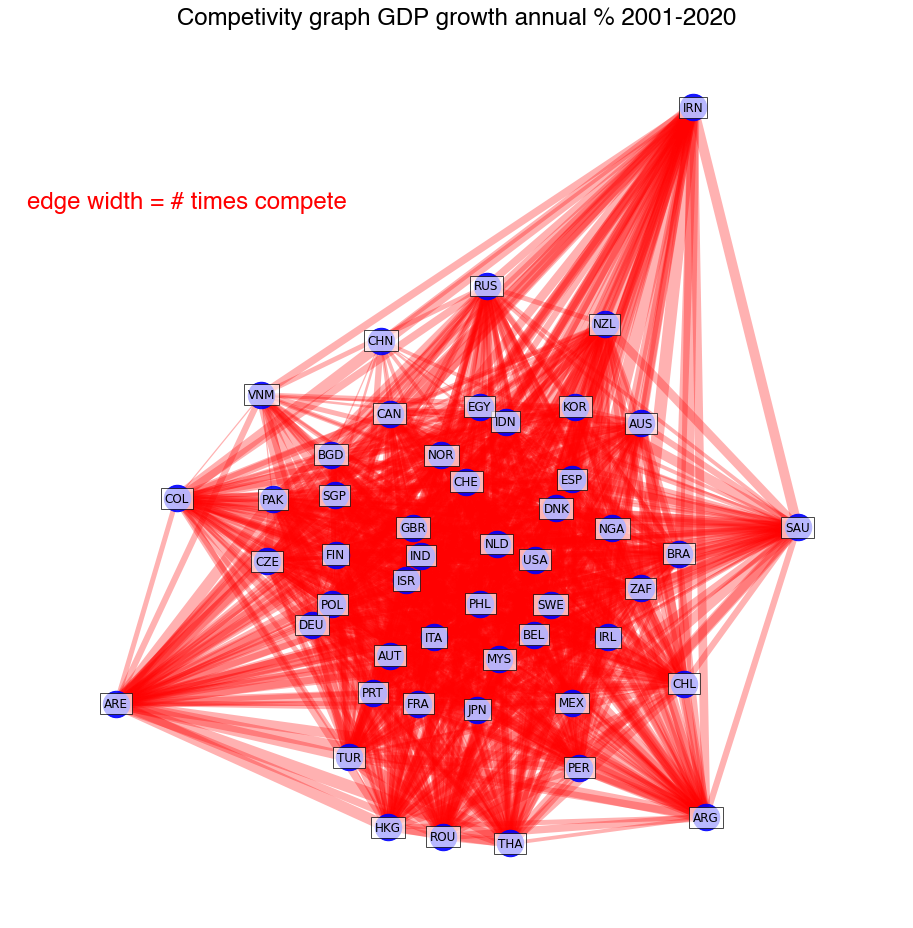

In [133]:
#Generate layout for visualization
pos = nx.kamada_kawai_layout(G_growth)
# Manual tweaking to limit node label overlap in the visualization

#edgewidth in function of weight
edgewidth = [1.25*G_growth.get_edge_data(u, v)['weight'] for u, v in G_growth.edges()]
fig, ax = plt.subplots(figsize=(13, 13))
# Visualize graph components
nx.draw_networkx_edges(G_growth, pos, alpha=0.3, width=edgewidth, edge_color="red")
nx.draw_networkx_nodes(G_growth, pos, node_size=700,node_color="blue", alpha=0.9)
label_options = {"ec": "k", "fc": "white", "alpha": 0.7}
nx.draw_networkx_labels(G_growth, pos, font_size=12, bbox=label_options)

# Title/legend
font = {"fontname": "Helvetica", "color": "black", "fontweight": "bold", "fontsize": 24}
ax.set_title("Competivity graph GDP growth annual % 2001-2020", font)
# Change font color for legend
font["color"] = "r"

ax.text(
    0.20,
    0.80,
    "edge width = # times compete",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)


# Resize figure for label readibility
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
plt.savefig("CGraph GDP growth.png")
plt.show()

## Pruebas con grafo ponderado

In [93]:
l1 = []
for i in AdyEnt:
    l1.append(np.asarray(i))
l1 = np.asarray(l1)

In [94]:
G= nx.from_numpy_matrix(l1)

In [95]:
G.number_of_nodes()

50

In [96]:
G=nx.relabel_nodes(G,dictIndices)

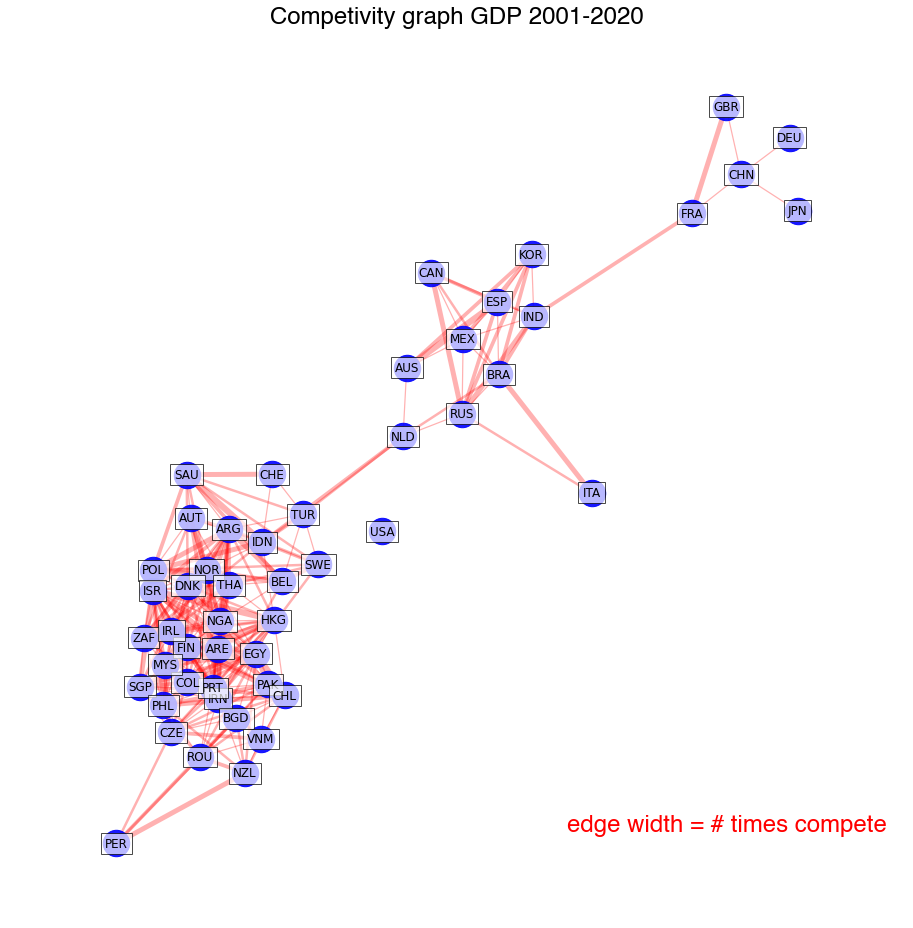

In [97]:
# Generate layout for visualization
pos = nx.kamada_kawai_layout(G)
# Manual tweaking to limit node label overlap in the visualization

#edgewidth in function of weight
edgewidth = [1.25*G.get_edge_data(u, v)['weight'] for u, v in G.edges()]
fig, ax = plt.subplots(figsize=(13, 13))
# Visualize graph components
nx.draw_networkx_edges(G, pos, alpha=0.3, width=edgewidth, edge_color="red")
nx.draw_networkx_nodes(G, pos, node_size=700,node_color="blue", alpha=0.9)
label_options = {"ec": "k", "fc": "white", "alpha": 0.7}
nx.draw_networkx_labels(G, pos, font_size=12, bbox=label_options)

# Title/legend
font = {"fontname": "Helvetica", "color": "black", "fontweight": "bold", "fontsize": 24}
ax.set_title("Competivity graph GDP 2001-2020", font)
# Change font color for legend
font["color"] = "r"

ax.text(
    0.80,
    0.10,
    "edge width = # times compete",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)


# Resize figure for label readibility
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
plt.savefig("Competitivity weighted graph.png")
plt.show()

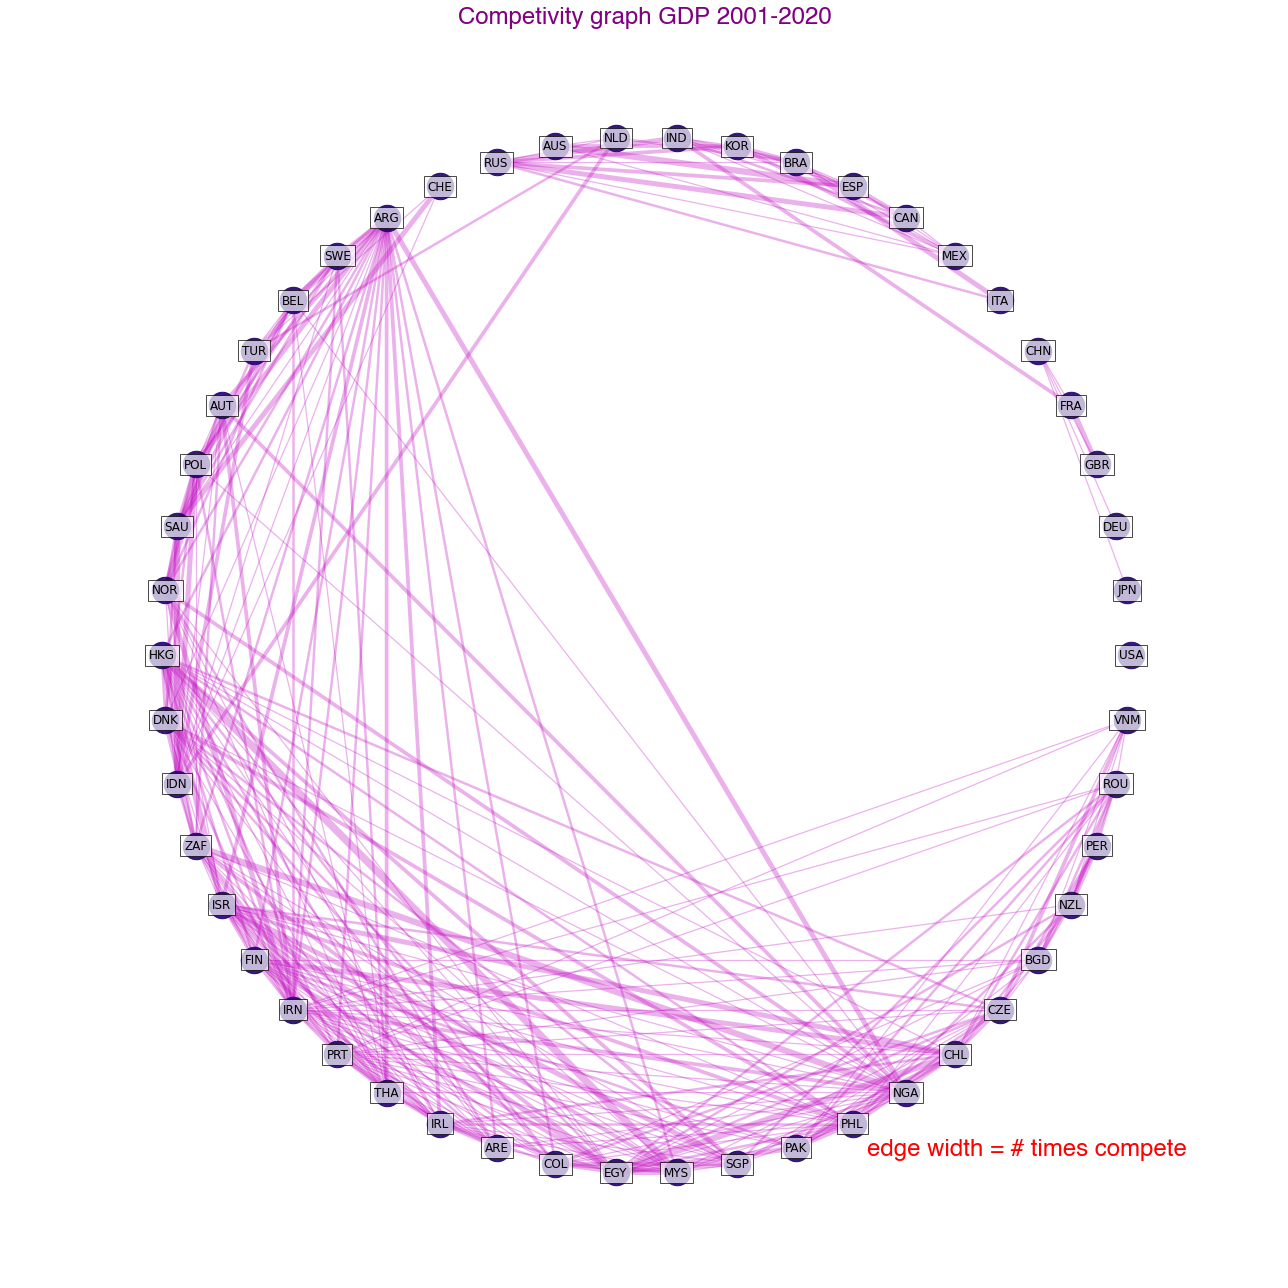

In [98]:
# Generate layout for visualization
pos = nx.circular_layout(G)
# Manual tweaking to limit node label overlap in the visualization

#edgewidth = [len(G.get_edge_data(u, v)) for u, v in G.edges()]
edgewidth = [1.25*G.get_edge_data(u, v)['weight'] for u, v in G.edges()]
fig, ax = plt.subplots(figsize=(18, 18))
# Visualize graph components
nx.draw_networkx_edges(G, pos, alpha=0.3, width=edgewidth, edge_color="m")
nx.draw_networkx_nodes(G, pos, node_size=700,node_color="#210070", alpha=0.9)
label_options = {"ec": "k", "fc": "white", "alpha": 0.7}
nx.draw_networkx_labels(G, pos, font_size=12, bbox=label_options)

# Title/legend
font = {"fontname": "Helvetica", "color": "purple", "fontweight": "bold", "fontsize": 24}
ax.set_title("Competivity graph GDP 2001-2020", font)
# Change font color for legend
font["color"] = "r"

ax.text(
    0.80,
    0.10,
    "edge width = # times compete",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)


# Resize figure for label readibility
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
plt.show()

### Imagenes con betweenness centrality de aristas para representaciones en memoria

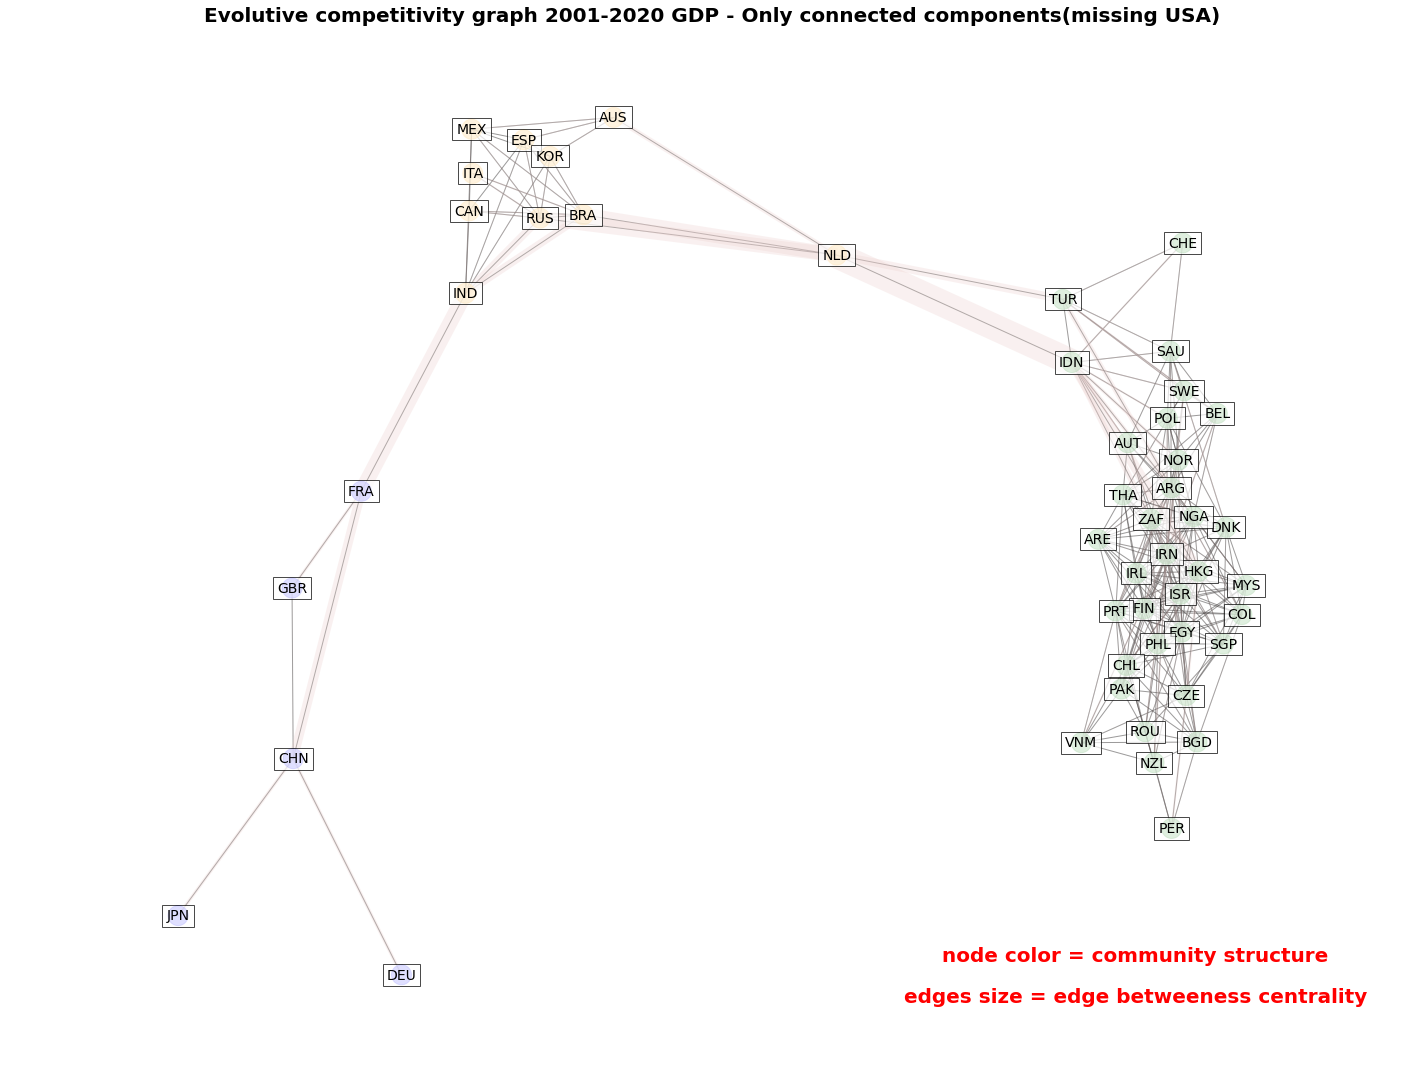

In [101]:
from random import sample
import networkx as nx
import matplotlib.pyplot as plt





# largest connected component
components = nx.connected_components(G)
largest_component = max(components, key=len)
H = G.subgraph(largest_component)
#H=G comentar 3 arri a y descomentar esta para que salga USA 
# compute centrality
centrality = nx.edge_betweenness_centrality(H)

# compute community structure
lpc = nx.community.label_propagation_communities(H)
community_index = {n: i for i, com in enumerate(lpc) for n in com}

#### draw graph ####
fig, ax = plt.subplots(figsize=(20, 15))
pos = nx.spring_layout(H, k=0.15, seed=4572321)
nx.draw_networkx_labels(H, pos, font_size=14, bbox=label_options)
node_color = [community_index[n] for n in H]
colores = []
for i in node_color:
    if i==0:
        colores.append("blue")
    elif i==1:
        colores.append("orange")
    else:
        colores.append("green")
edge_size = [v * 20000 for v in centrality.values()]
nx.draw_networkx(
    H,
    pos=pos,
    with_labels=False,
    node_color=colores,
    node_size=400,
    #edge_color="#edd0ce",
    alpha=0.4,
)
nx.draw_networkx_edges(G, pos, alpha=0.3, width=[80*centrality[(u, v)] for u, v in G.edges()], edge_color="#edd0ce")
# Title/legend
font = {"color": "k", "fontweight": "bold", "fontsize": 20}
ax.set_title("Evolutive competitivity graph 2001-2020 GDP - Only connected components(missing USA)", font)
# Change font color for legend
font["color"] = "r"

ax.text(
    0.80,
    0.10,
    "node color = community structure",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)
ax.text(
    0.80,
    0.06,
    "edges size = edge betweeness centrality",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)

# Resize figure for label readibility
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
plt.savefig("diagrama con ancho bordes por betweeness de borde.png")
plt.show()


In [100]:
centrality = nx.edge_betweenness_centrality(H)
sortedDict = sorted(centrality.items(), key=lambda x: x[1])
sortedDict

[(('MEX', 'ESP'), 0.0008503401360544217),
 (('BRA', 'RUS'), 0.0008503401360544217),
 (('MEX', 'KOR'), 0.001020408163265306),
 (('ESP', 'KOR'), 0.001020408163265306),
 (('ISR', 'IRL'), 0.0010334903192046048),
 (('COL', 'MYS'), 0.001057474271759986),
 (('EGY', 'PHL'), 0.0011708529565672423),
 (('SGP', 'PHL'), 0.0012117346938775512),
 (('ISR', 'MYS'), 0.0012329931972789115),
 (('IRL', 'ARE'), 0.001255242773099916),
 (('NZL', 'ROU'), 0.0012633624878522838),
 (('SWE', 'BEL'), 0.0012836086815678652),
 (('FIN', 'IRL'), 0.0013025585692152317),
 (('MYS', 'SGP'), 0.001324469181612039),
 (('AUT', 'POL'), 0.0013295000539898499),
 (('ISR', 'FIN'), 0.001377136768793431),
 (('ISR', 'ARE'), 0.0013815753574156935),
 (('BGD', 'ROU'), 0.0013899011985746678),
 (('IRL', 'MYS'), 0.0014161433804290948),
 (('ISR', 'COL'), 0.0014280409688572952),
 (('HKG', 'ZAF'), 0.0014424893889179603),
 (('MEX', 'CAN'), 0.0014455782312925171),
 (('CAN', 'ESP'), 0.0014455782312925171),
 (('COL', 'SGP'), 0.0014600974422402993)

### Salida completa del algoritmo de Girvan Newmann para generar el dendograma

In [105]:
#Por girvan Newman, primera separacion arista NLD IDN -> primera separación grupos
#segunda FRA IND, separa grupo perteneciente a francia con el de IDN - ver en dendograma aunque no
# tiene por que ser como en el dendograma (ver abajo)
#la siguiente vemos que es NLD RUS... por que no es coherente con el dendograma?? -> cada iteración
# tenemos una estructura de grafos distinta y se recalcula la betweeness... en el gráfico se muestra
# la betweeness del grafo original no del resto
for i in communities:
    print(i)

({'USA'}, {'JPN', 'CAN', 'ITA', 'RUS', 'GBR', 'DEU', 'IND', 'BRA', 'CHN', 'NLD', 'ESP', 'KOR', 'AUS', 'FRA', 'MEX'}, {'AUT', 'POL', 'CHL', 'FIN', 'NZL', 'BGD', 'PAK', 'IDN', 'VNM', 'NOR', 'ZAF', 'ROU', 'MYS', 'CHE', 'SGP', 'ARE', 'CZE', 'BEL', 'IRN', 'PRT', 'ISR', 'DNK', 'EGY', 'HKG', 'COL', 'SWE', 'IRL', 'SAU', 'ARG', 'NGA', 'PHL', 'PER', 'TUR', 'THA'})
({'USA'}, {'JPN', 'GBR', 'DEU', 'CHN', 'FRA'}, {'CAN', 'ITA', 'RUS', 'IND', 'BRA', 'NLD', 'ESP', 'KOR', 'AUS', 'MEX'}, {'AUT', 'POL', 'CHL', 'FIN', 'NZL', 'BGD', 'PAK', 'IDN', 'VNM', 'NOR', 'ZAF', 'ROU', 'MYS', 'CHE', 'SGP', 'ARE', 'CZE', 'BEL', 'IRN', 'PRT', 'ISR', 'DNK', 'EGY', 'HKG', 'COL', 'SWE', 'IRL', 'SAU', 'ARG', 'NGA', 'PHL', 'PER', 'TUR', 'THA'})
({'USA'}, {'JPN', 'GBR', 'DEU', 'CHN', 'FRA'}, {'CAN', 'ITA', 'RUS', 'IND', 'BRA', 'NLD', 'ESP', 'KOR', 'AUS', 'MEX'}, {'SAU', 'IDN', 'CHE', 'SWE', 'TUR'}, {'AUT', 'POL', 'CHL', 'FIN', 'NZL', 'BGD', 'PAK', 'VNM', 'NOR', 'ZAF', 'ROU', 'MYS', 'SGP', 'ARE', 'CZE', 'BEL', 'IRN', 'PRT', '

In [107]:
cd

/Users/mariocanalestorres


In [108]:
cd ./Documents/TFG\ Matemáticas

/Users/mariocanalestorres/Documents/TFG Matemáticas


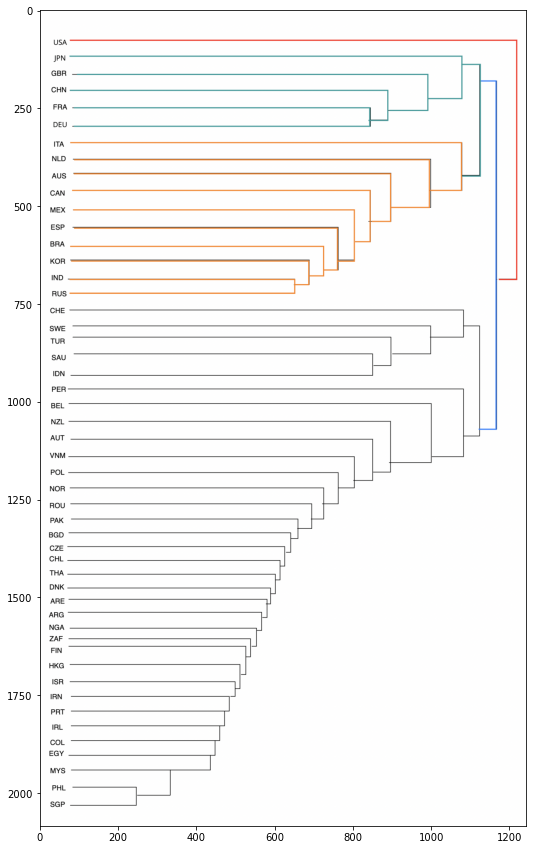

In [110]:
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('DENDOGRAMA SIN MARCA DE AGUA.png'))